#CONVOLUTIONAL NEURAL NETWORK

#install lib

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 17.1 MB/s eta 0:00:00


#import lib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Convolution2D,MaxPooling2D
from keras import utils
from keras.datasets import mnist

In [ ]:
import visualkeras

In [ ]:
from tensorflow.keras.utils import plot_model

#load dataset

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


#viewing image from dataset

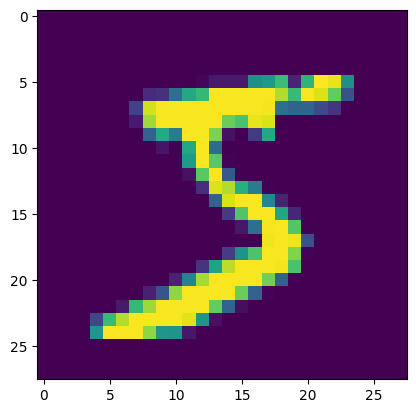

In [ ]:
plt.imshow(xtrain[0])
plt.show()

In [ ]:
ytrain[0]

5

#reshaping

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
xtrain=xtrain.reshape(60000,28,28,1)

In [ ]:
xtest=xtest.reshape(10000,28,28,1)

#type conversion

In [ ]:
xtrain.dtype

dtype('uint8')

In [ ]:
xtrain=xtrain.astype('float32')

In [ ]:
xtest=xtest.astype('float32')

#rescaling

In [ ]:
xtrain/=255

In [ ]:
xtest/=255

#convert labels to categ

In [ ]:
ytrain=utils.to_categorical(ytrain,10)

In [ ]:
ytest=utils.to_categorical(ytest,10)

In [ ]:
ytrain[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

#model architecture

In [ ]:
model=Sequential()

#building model

In [ ]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))


#compiling model

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

#model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

#visualize net

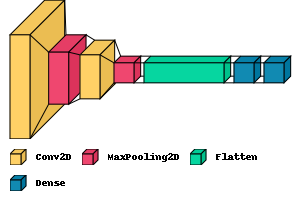

In [ ]:
visualkeras.layered_view(model,legend=True)

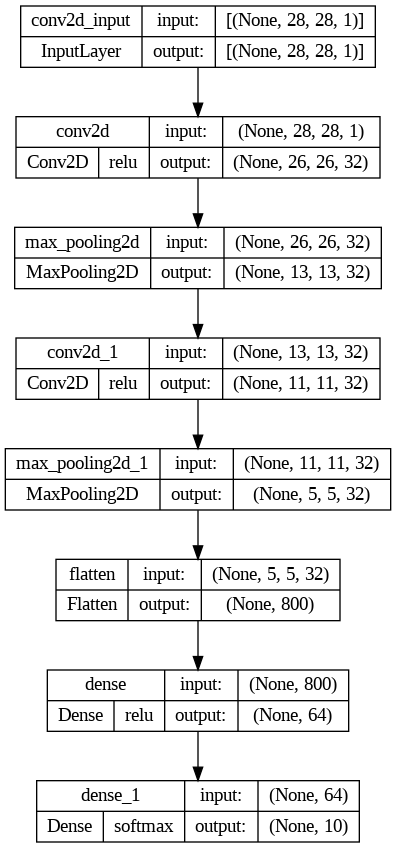

In [ ]:
plot_model(model,show_shapes=True,show_dtype=False,to_file="CNN-mnist.png",show_layer_names=True,expand_nested=True,dpi=96,layer_range=None,show_layer_activations=True)

#fitting values to model

In [ ]:
model.fit(xtrain,ytrain,batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 9s 9ms/step - loss: 0.2736 - accuracy: 0.9190
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0720 - accuracy: 0.9778
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0512 - accuracy: 0.9845
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0426 - accuracy: 0.9867
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0341 - accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0294 - accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0257 - accuracy: 0.9918
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0218 - accuracy: 0.9935
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0167 - accuracy: 0.994

#model prediction

In [ ]:
y_pred=model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred[3]

array([9.9997425e-01, 6.2552397e-10, 2.2846486e-07, 1.6461991e-08,
       1.5781860e-09, 7.7334853e-08, 2.5186826e-05, 1.6408866e-07,
       2.2780485e-08, 1.4663237e-07], dtype=float32)

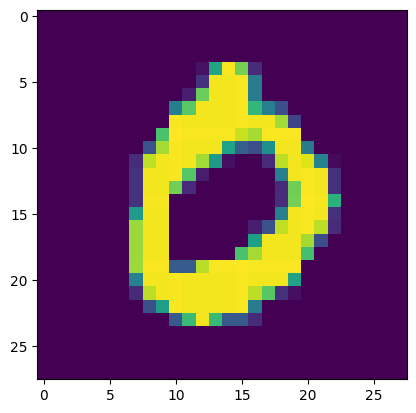

In [ ]:
plt.imshow(xtest[3])

In [ ]:
np.argmax(y_pred[3])

0

In [ ]:
res=model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9916


In [ ]:
res

[0.03161745145916939, 0.991599977016449]